In [34]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from bisect import bisect
%matplotlib inline

In [26]:
tsp=nx.Graph()
tsp.add_edge(1,2,dist=1)
tsp.add_edge(1,3,dist=1)
tsp.add_edge(1,4,dist=2)
tsp.add_edge(2,3,dist=3)
tsp.add_edge(2,4,dist=4)
tsp.add_edge(3,4,dist=2)

In [300]:
def init_graph(tsp):
    g=tsp.copy()
    for u,v in g.edges():
        g[u][v]['p']=0.5
        g[u][v]['dist']=0.0
        
    #print g.edges(data=True)
    
    return g

def walk(g,start,alpha,beta,tsp):
    #initialize
    tabu=[start]
    
    for i in xrange(g.number_of_nodes()-1):
        #get pheromone list
        n_l=[]
        p_l=[]
        h_l=[]
        for n in g.nodes():
            if n not in tabu:
                n_l.append(n)
                p_l.append(g[tabu[-1]][n]['p'])
                if g[tabu[-1]][n]['dist']==0.0:
                    h_l.append(10.0)
                else:
                    h_l.append(1.0/g[tabu[-1]][n]['dist'])
        c_l=np.power(p_l,alpha)*np.power(h_l,beta)
        n_index=make_decision(c_l)
        new_n=n_l[n_index]
        tabu.append(new_n)
    
    score=0.0
    e_r=[tuple(tabu[i:i+2]) for i in xrange(0,len(tabu), 1)]
    del e_r[-1]

    for e in e_r:
        score+=float(tsp[e[0]][e[1]]['dist'])
    
    return tuple(tabu), score

def update_edges(g,route,score,p,tsp):
    g_t=g.copy()
    #print 'before', g_t.edges(data=True)
    #print 'reduction', p
    e_r=[tuple(route[i:i+2]) for i in xrange(0,len(route), 1)]
    del e_r[-1]
    t_update=1.0/score
    for e in g_t.edges():
        g_t[e[0]][e[1]]['p']=float(g[e[0]][e[1]]['p'])*(1.0-p)
    
    changed_d=[]
    for e in e_r:
        #update dist
        if g_t[e[0]][e[1]]['dist']==0.0:
            changed_d.append(e)
            g_t[e[0]][e[1]]['dist']=float(tsp[e[0]][e[1]]['dist'])
        g_t[e[0]][e[1]]['p']=float(g_t[e[0]][e[1]]['p'])+t_update*p
            
    #print 'after', g_t.edges(data=True)    
    return g_t,changed_d
        
    

def make_decision(ph_l):
    """
    Return decision index, based on pheromone list.
    """
    #convert pheromones to percentage
    if sum(ph_l)==0.0:
        percent_list=[1.0/len(ph_l)]*len(ph_l)
    else:
        percent_list = [float(i)/sum(ph_l) for i in ph_l]   
    cumulative_percent=np.cumsum(percent_list)
    #print cumulative_percent

    #Choose decision index
    select_index=bisect(cumulative_percent,np.random.uniform(0,1,1))

    return select_index

def k_init(g):
    k=nx.DiGraph()
    last_visited={}
    step=0
    for u,v,d in g.edges(data=True):
        last_visited[(u,v)]={}
        n_label=k.number_of_nodes()+1
        k.add_node(n_label,label=(u,v),p=float(d['p']),step=step)
        last_visited[(u,v)]['p']=n_label
        n_label=k.number_of_nodes()+1
        k.add_node(n_label,label=(u,v),dist=float(d['dist']),step=step)
        last_visited[(u,v)]['dist']=n_label
        
    return k,last_visited
        

def k_step(k,t_new,t_old,route,last_visited,changed_d):
    #get step number
    
    #route
    n_label=k.number_of_nodes()+1
    k.add_node(n_label,r=tuple(route),step=step)
    
    #changed distance
    for e in changed_d:
        n_label=k.number_of_nodes()+1
        k.add_node(n_label,)
    
    for e,d in last_visited.iteritems():
        
    
    

In [208]:
t=init_graph(tsp)
#print t.edges(data=True)
r,s=walk(t,start=1,alpha=0.0,beta=0.0,tsp=tsp)
print r,s,1.0/s*.2
t=update_edges(t,r,s,.2,tsp)
#print t.edges(data=True)
r,s=walk(t,start=1,alpha=0.0,beta=0.0,tsp=tsp)
print r,s,1.0/s*.2
t=update_edges(t,r,s,.2,tsp)
#print t.edges(data=True)

[1, 4, 3, 2] 7.0 0.0285714285714
before [(1, 2, {'p': 0.0, 'dist': 0.0}), (1, 3, {'p': 0.0, 'dist': 0.0}), (1, 4, {'p': 0.0, 'dist': 0.0}), (2, 3, {'p': 0.0, 'dist': 0.0}), (2, 4, {'p': 0.0, 'dist': 0.0}), (3, 4, {'p': 0.0, 'dist': 0.0})]
reduction 0.2
(1, 4) 2
(4, 3) 2
(3, 2) 3
after [(1, 2, {'p': 0.0, 'dist': 0.0}), (1, 3, {'p': 0.0, 'dist': 0.0}), (1, 4, {'p': 0.02857142857142857, 'dist': 2.0}), (2, 3, {'p': 0.02857142857142857, 'dist': 3.0}), (2, 4, {'p': 0.0, 'dist': 0.0}), (3, 4, {'p': 0.02857142857142857, 'dist': 2.0})]
[1, 4, 3, 2] 7.0 0.0285714285714
before [(1, 2, {'p': 0.0, 'dist': 0.0}), (1, 3, {'p': 0.0, 'dist': 0.0}), (1, 4, {'p': 0.02857142857142857, 'dist': 2.0}), (2, 3, {'p': 0.02857142857142857, 'dist': 3.0}), (2, 4, {'p': 0.0, 'dist': 0.0}), (3, 4, {'p': 0.02857142857142857, 'dist': 2.0})]
reduction 0.2
after [(1, 2, {'p': 0.0, 'dist': 0.0}), (1, 3, {'p': 0.0, 'dist': 0.0}), (1, 4, {'p': 0.05142857142857143, 'dist': 2.0}), (2, 3, {'p': 0.05142857142857143, 'dist': 3.

In [123]:
n=[0,1,2,3]
a=[.1,.3,.4,.2]
b=[.5,.2,.2,.1]
c=np.power(a,1.0)*np.power(b,1.0)
print c
i=make_decision(c)
print i
print n[i]

[ 0.05  0.06  0.08  0.02]
0
0


In [74]:
t=init_graph(tsp)
print t.number_of_nodes()
    
print t.edges(data=True)
print t[4][3]['p']

4
[(1, 2, {'p': 0.0, 'dist': 0.0}), (1, 3, {'p': 0.0, 'dist': 0.0}), (1, 4, {'p': 0.0, 'dist': 0.0}), (2, 3, {'p': 0.0, 'dist': 0.0}), (2, 4, {'p': 0.0, 'dist': 0.0}), (3, 4, {'p': 0.0, 'dist': 0.0})]
0.0


In [158]:
walk(t,start=1,alpha=0.0,beta=0.0,tsp=tsp)

(1, 4, 2, 3) 2.0


([1, 4, 2, 3], 2.0)

[(1, 2, {'p': 0.2499999611795155, 'dist': 1.0}), (1, 3, {'p': 0.24999996925835727, 'dist': 1.0}), (1, 4, {'p': 1.4493399432807825e-08, 'dist': 2.0}), (2, 3, {'p': 3.0762516667606534e-08, 'dist': 3.0}), (2, 4, {'p': 8.444501237390941e-09, 'dist': 4.0}), (3, 4, {'p': 0.24999995781507173, 'dist': 2.0})]


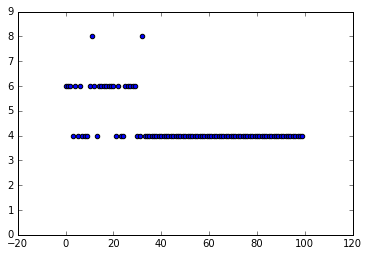

In [297]:
t=init_graph(tsp)
p=.2
routes=[]
for i in xrange(100):
    r,s=walk(t,start=4,alpha=1.0,beta=1.0,tsp=tsp)
    routes.append((r,s))
    t_new=update_edges(t,r,s,p,tsp)
    t=t_new.copy()
    #print t.edges(data=True)
                  
#print routes
print t.edges(data=True)

s=[i[1] for i in routes]
gen=xrange(len(s))
plt.scatter(gen,s)
_=plt.ylim([0.0,max(s)+1.0])

In [301]:
t=init_graph(tsp)
k,l_v=k_init(t)
print k.nodes(data=True)
print l_v


[(1, {'p': 0.5, 'step': 0, 'label': (1, 2)}), (2, {'step': 0, 'dist': 0.0, 'label': (1, 2)}), (3, {'p': 0.5, 'step': 0, 'label': (1, 3)}), (4, {'step': 0, 'dist': 0.0, 'label': (1, 3)}), (5, {'p': 0.5, 'step': 0, 'label': (1, 4)}), (6, {'step': 0, 'dist': 0.0, 'label': (1, 4)}), (7, {'p': 0.5, 'step': 0, 'label': (2, 3)}), (8, {'step': 0, 'dist': 0.0, 'label': (2, 3)}), (9, {'p': 0.5, 'step': 0, 'label': (2, 4)}), (10, {'step': 0, 'dist': 0.0, 'label': (2, 4)}), (11, {'p': 0.5, 'step': 0, 'label': (3, 4)}), (12, {'step': 0, 'dist': 0.0, 'label': (3, 4)})]
{(1, 2): {'p': 1, 'dist': 2}, (1, 3): {'p': 3, 'dist': 4}, (1, 4): {'p': 5, 'dist': 6}, (2, 3): {'p': 7, 'dist': 8}, (3, 4): {'p': 11, 'dist': 12}, (2, 4): {'p': 9, 'dist': 10}}


In [281]:
for u,v,d in t.edges(data=True):
    print u,v,d

1 2 {'p': 0.5, 'dist': 0.0}
1 3 {'p': 0.5, 'dist': 0.0}
1 4 {'p': 0.5, 'dist': 0.0}
2 3 {'p': 0.5, 'dist': 0.0}
2 4 {'p': 0.5, 'dist': 0.0}
3 4 {'p': 0.5, 'dist': 0.0}
